
<h1 align="center">📊 MNAF2025</h1>
<h2 align="center">Métodos Numéricos y Análisis Funcional</h2>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

![Python](https://img.shields.io/badge/Python-3.8+-3776AB?style=for-the-badge&logo=python&logoColor=white)
![NumPy](https://img.shields.io/badge/NumPy-013243?style=for-the-badge&logo=numpy&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-11557c?style=for-the-badge&logo=python&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626?style=for-the-badge&logo=jupyter&logoColor=white)

</td>
</tr>
</table>

<h3 align="center">🎓 Curso de Métodos Numéricos Avanzados</h3>

---

<br>

> **📌 Nota:** Este notebook contiene implementaciones referidas a la asignatura Metodos Numéricos aplicados a la fisica de Uniovi en 2025.



---

## 📑 Índice de Contenidos

### 📌 Secciones Principales

1. **[Configuración e Imports](#Configuración-e-Imports)**

2. **[Ejercicio 1: Base de Polinomios de Lagrange](#Ejercicio-1:-base-de-polinomios-de-lagrange)**

3. **[Ejercicio 2: Interpolación de Tchebishev](#Ejercicio-2:-interpolación-de-tchebishev)**

4. **[📚 Referencias y Recursos](#Referencias-y-recursos-adicionales)**

---

## Configuración e Imports

<div style="background-color: #e3f2fd; padding: 12px; border-left: 4px solid #2196F3; border-radius: 4px; margin: 10px 0;">

**Librerías utilizadas:**
- `numpy`: Computación numérica y álgebra lineal
- `matplotlib`: Visualización de datos y gráficas
- `scipy`: Métodos científicos avanzados
- `sympy`: Matemática simbólica
- `numpy.polynomial`: Manipulación de polinomios

</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
import mpl_toolkits.mplot3d as p3d
import numpy.polynomial as poly
from math import *


---

## ***Ejercicio 1: Base de Polinomios de Lagrange***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Desarrollar una función que construya la **base de polinomios de Lagrange** a partir de un conjunto de puntos dados, permitiendo la interpolación polinomial de cualquier función.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>base_Lagrange(x)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Entrada</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Soporte de puntos: lista, tupla o array de numpy</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Lista con los polinomios $L_k(x)$ de la base</td>
</tr>
</table>

### 📖 Fundamento Teórico

Los **polinomios de Lagrange** constituyen una base para el espacio vectorial de polinomios de grado $\leq n-1$. Cada polinomio base $L_k(x)$ satisface:

$$
L_k(x_i) = \delta_{ki} = 
\begin{cases} 
1 & \text{si } i = k \\
0 & \text{si } i \neq k 
\end{cases}
$$

Donde $\delta_{ki}$ es la delta de Kronecker.

#### 🔑 Propiedad Fundamental: Partición de la Unidad

$$\sum_{k=0}^{n-1} L_k(x) = 1, \quad \forall x \in \mathbb{R}$$

Esta propiedad garantiza que cualquier función puede interpolarse como:

$$P(x) = \sum_{k=0}^{n-1} f(x_k) \cdot L_k(x)$$

### 💻 Implementación

In [2]:

def base_Lagrange(x):

    L=[]
    suma=0

    # * Preparar datos de entrada como lista

    if isinstance(x, tuple):
        x = list(x)
    elif isinstance(x, np.ndarray):
        x = x.tolist()
    elif isinstance(x, list):
        pass
    else:
        raise ValueError("Tipo de dato no soportado")
    print(f"tipo: {type(x)}, valor: {x} \n")
    
    # * Crear datos de salida: polinomios de Lagrange

    for i in range(len(x)):
        soporte = x.copy()
        x_k = soporte.pop(i)
        P = poly.Polynomial.fromroots(soporte)
        L_k = P/P(x_k)
        L.append(L_k)

    # * Graficar los polinomios de Lagrange

    x_vals = np.linspace(min(x), max(x), 1000)
    plt.figure(figsize=(4,3))
    plt.title(f"Base de Lagrange con soporte {x}")
    plt.xlabel("x")
    plt.ylabel("L_k(x)")
    plt.grid()
    for L_k in L:
        y_vals = L_k(x_vals)
        plt.plot(x_vals, y_vals, label=f"$L_{L.index(L_k)}(x)$")
        suma += L_k

    plt.legend()
    plt.show()

    # * Ver si la suma tiene sentido

    print(f" la suma es {suma} \n")
    plt.figure(figsize=(4,3))
    plt.title(f"Suma de polinomios de Lagrange")
    plt.xlabel("x")
    plt.ylabel("Suma de L_k(x)")
    plt.grid()
    y_vals = suma(x_vals)
    plt.plot(x_vals, y_vals, label=f"Suma de L_k(x)")
    plt.legend()
    plt.show()

    # * Lo que devuelve la función

    return L


### 🧪 Pruebas y Validación

<div style="background-color: #e8f5e9; padding: 12px; border-left: 4px solid #4CAF50; border-radius: 4px; margin: 10px 0;">

**Verificaciones realizadas:**
- ✅ Propiedad de Kronecker: $L_k(x_k) = 1$
- ✅ Propiedad de ortogonalidad: $L_k(x_j) = 0$ para $j \neq k$
- ✅ Partición de la unidad: $\sum_k L_k(x) = 1$

</div>

tipo: <class 'list'>, valor: [-2, -1, 1, 2] 



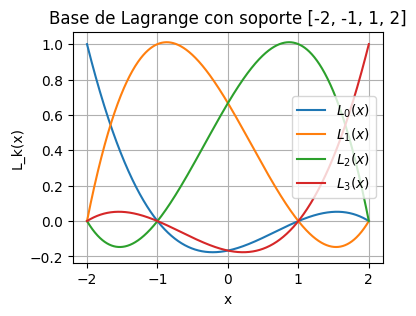

 la suma es 1.0 + (4.16333634e-17)·x 



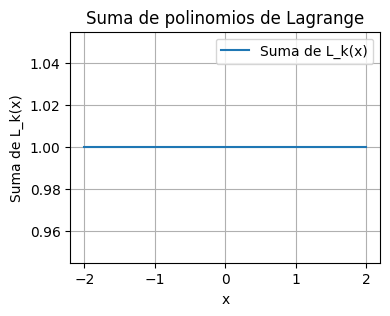

[Polynomial([-0.16666667,  0.08333333,  0.16666667, -0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667, -0.66666667, -0.16666667,  0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667,  0.66666667, -0.16666667, -0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-0.16666667, -0.08333333,  0.16666667,  0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]


In [3]:
base_lagrange = base_Lagrange((-2,-1,1,2))
print(base_lagrange)


---

## ***Ejercicio 2: Interpolación de Tchebishev***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Implementar un algoritmo de **interpolación polinomial utilizando nodos de Tchebishev**, que minimiza el error máximo de aproximación y evita el fenómeno de Runge.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>itp_Tchebishev(fun, npts, a, b)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función a interpolar<br>
<code>npts</code>: número de nodos<br>
<code>[a, b]</code>: intervalo de interpolación
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Polinomio interpolante de grado <code>npts-1</code></td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Los Nodos de Tchebishev

Los **nodos de Tchebishev** son las raíces del polinomio de Tchebishev $T_n(x)$ en el intervalo $[-1, 1]$:

$$x_k = \cos\left(\frac{(2k-1)\pi}{2n}\right), \quad k = 1, 2, \ldots, n$$

#### Transformación al Intervalo $[a, b]$

Para interpolar en un intervalo arbitrario $[a, b]$, aplicamos la transformación lineal:

$$\tilde{x}_k = \frac{b-a}{2} x_k + \frac{b+a}{2}$$

### ⚡ Ventajas de los Nodos de Tchebishev

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 5px; margin: 10px 0;">

✅ **Minimización del error**: Los nodos de Tchebishev minimizan la cota superior del error de interpolación

✅ **Evitan el fenómeno de Runge**: No presentan oscilaciones salvajes en los extremos del intervalo

✅ **Convergencia exponencial**: Para funciones analíticas, el error decrece exponencialmente con $n$

✅ **Distribución óptima**: Mayor densidad de puntos cerca de los extremos, donde el error tiende a ser mayor

</div>

### ⚠️ El Fenómeno de Runge

<div style="background-color: #ffebee; padding: 15px; border-left: 4px solid #f44336; border-radius: 4px; margin: 10px 0;">

**Advertencia importante:**

El uso de **nodos equiespaciados** en interpolación polinomial puede producir:
- 📉 Grandes oscilaciones cerca de los extremos del intervalo
- 📈 Aumento del error al incrementar el número de nodos
- 🔄 Divergencia de la aproximación para funciones como $f(x) = \frac{1}{1+25x^2}$

Los **nodos de Tchebishev** resuelven completamente este problema, garantizando convergencia uniforme.

</div>

### 💻 Implementación

In [4]:
def itp_Tchebishev(fun,ntps,a,b):
    # * Nodos de Tchebishev en [-1,1]
    xk = [np.cos((2*k+1)*np.pi/(2*ntps)) for k in range(ntps)]

    # * Transformar nodos a [a,b]
    xk_ab = [0.5*(b-a)*x + 0.5*(a+b) for x in xk]

    # * Construcción base de lagrange
    L=[]
    for i in range(len(xk_ab)):
        soporte = xk_ab.copy()
        x_k = soporte.pop(i)
        P = poly.Polynomial.fromroots(soporte)
        L_k = P/P(x_k)
        L.append(L_k)

    # * Construcción del polinomio interpolante
    for i in range(len(xk_ab)):
        if i==0:
            P_itp = fun(xk_ab[i])*L[i]
        else:
            P_itp += fun(xk_ab[i])*L[i]

    return P_itp

### 🧪 Pruebas y Validación

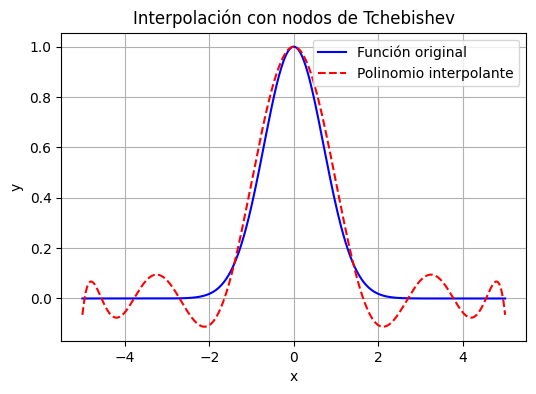

In [10]:
fun=lambda x: e**(-x**2)
ntps=11
a=-5
b=5
P_itp = itp_Tchebishev(fun,ntps,a,b)

plt.figure(figsize=(6,4))
x_vals = np.linspace(a,b,1000)
plt.plot(x_vals, fun(x_vals), label="Función original", color="blue")
plt.plot(x_vals, P_itp(x_vals), label="Polinomio interpolante", color="red", linestyle="--")
plt.title("Interpolación con nodos de Tchebishev")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


---

## ***Ejercicio 3: Interpolante paramétrico***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule el interpolante paramétrico mediante splines cúbicas de
tipo dado por bc_type. Se le puede pasar el parámetro u o sino crea uno proporcional a la distancia entre los puntos
y definido en $[0,1]$. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>itp_parametrica(data, bc_type='natural', u=None)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>data</code>: datos<br>
<code>bc_type</code>='natural'<br>
<code>u</code>=None
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
fynción vectorial de interpolación <code>funitp</code><br>
<br>
valor del parámetro en los puntos de <code>param</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Interpolación Paramétrica con Splines Cúbicas

La **interpolación paramétrica** permite representar curvas complejas en el espacio mediante la parametrización de las coordenadas. En lugar de interpolar $y$ como función de $x$, ambas coordenadas se expresan como funciones de un parámetro $u \in [0,1]$:

$$\mathbf{r}(u) = (x(u), y(u))$$

#### Splines Cúbicas

Una **spline cúbica** es una función polinomial a trozos de grado 3 que satisface:

1. **Continuidad**: $S(u)$ es continua en todo el intervalo
2. **Suavidad**: $S'(u)$ y $S''(u)$ son continuas en los nodos
3. **Interpolación**: Pasa exactamente por los puntos dados

#### Condiciones de Frontera (`bc_type`)

- **`'natural'`**: Segunda derivada nula en los extremos ($S''(u_0) = S''(u_n) = 0$)
- **`'clamped'`**: Primera derivada especificada en los extremos
- **`'periodic'`**: Para curvas cerradas ($S(u_0) = S(u_n)$)

#### Parametrización

Si no se proporciona $u$, se utiliza la **parametrización por longitud de arco acumulada**:

$$u_i = \frac{\sum_{j=1}^{i} \|\mathbf{p}_j - \mathbf{p}_{j-1}\|}{\sum_{j=1}^{n} \|\mathbf{p}_j - \mathbf{p}_{j-1}\|}$$

donde $\|\mathbf{p}_j - \mathbf{p}_{j-1}\|$ es la distancia euclidiana entre puntos consecutivos.



### 💻 Implementación
</div>


---

## ***Ejercicio 4: Derivación; obtencion de coeficientes***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los coeficientes de una regla de derivación numérica en los “puntos” para calcular la derivada “orden” usando los polinomios de la base de Lagrange definidos por “soporte”. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>dncoef_base(soporte,puntos,orden)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>soporte</code>: sporte dado<br>
<code>puntos</code>: puntos entregados<br>
<code>orden</code>: orden máximo
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los coeficientes para cada uno de los puntos  <code>coef</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Derivación Numérica mediante Polinomios de Lagrange

Los **coeficientes de derivación numérica** se obtienen derivando los polinomios de la base de Lagrange. Para calcular la $n$-ésima derivada de una función $f(x)$ en un punto $x_i$, usamos:

$$f^{(n)}(x_i) \approx \sum_{k=0}^{m} c_k^{(n)}(x_i) \cdot f(x_k)$$

donde $c_k^{(n)}(x_i)$ son los **coeficientes de derivación** obtenidos de:

$$c_k^{(n)}(x_i) = L_k^{(n)}(x_i)$$

#### Derivada de los Polinomios de Lagrange

Para el polinomio de Lagrange $L_k(x)$:

$$L_k(x) = \prod_{j \neq k} \frac{x - x_j}{x_k - x_j}$$

Su derivada de orden $n$ en $x_i$ proporciona directamente los coeficientes necesarios.

#### Propiedades de los Coeficientes

1. **Simetría**: Para nodos equiespaciados, los coeficientes tienen propiedades de simetría
2. **Suma**: $\sum_{k} c_k^{(0)}(x_i) = 1$ (interpolación exacta de constantes)
3. **Orden de precisión**: Una fórmula con $m+1$ puntos tiene orden $\mathcal{O}(h^{m-n+1})$

#### Ejemplos Clásicos

**Primera derivada - Diferencias centradas (2º orden)**:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$
Coeficientes: $c_{-1} = -\frac{1}{2h}$, $c_0 = 0$, $c_1 = \frac{1}{2h}$

**Segunda derivada - Diferencias centradas**:
$$f''(x) \approx \frac{f(x-h) - 2f(x) + f(x+h)}{h^2}$$
Coeficientes: $c_{-1} = \frac{1}{h^2}$, $c_0 = -\frac{2}{h^2}$, $c_1 = \frac{1}{h^2}$


### 💻 Implementación
</div>


---

## ***Ejercicio 5: Derivación; errores e inestabilidad***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule la derivada segunda de una función “fun” en “puntos” utilizando las reglas numéricas indicadas con el valor “h”. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>deriva2(fun,puntos,h)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función necesaria<br>
<code>puntos</code>: puntos dados<br>
<code>h</code>: reglas numéricas
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los resultados de las fórmulas para cada punto  <code>lista</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Derivación Numérica: Errores e Inestabilidad

El cálculo de derivadas numéricas está afectado por dos tipos de error que compiten entre sí:

#### 1. Error de Truncamiento

Proviene de aproximar la derivada mediante diferencias finitas. Para la segunda derivada con diferencias centradas:

$$f''(x) = \frac{f(x-h) - 2f(x) + f(x+h)}{h^2} - \frac{h^2}{12}f^{(4)}(\xi)$$

El error de truncamiento es $\mathcal{O}(h^2)$ y **disminuye** al reducir $h$.

#### 2. Error de Redondeo

Surge de los errores de representación en punto flotante. Si $\epsilon$ es el error relativo en los valores de $f$:

$$\text{Error de redondeo} \approx \frac{4\epsilon |f(x)|}{h^2}$$

Este error **aumenta** al reducir $h$, especialmente para derivadas de orden superior.

#### Error Total

El error total es la suma:

$$E_{total}(h) = \underbrace{\frac{C_1 h^p}{p!}}_{\text{truncamiento}} + \underbrace{\frac{C_2 \epsilon}{h^q}}_{\text{redondeo}}$$

#### Valor Óptimo de $h$

Existe un valor óptimo $h^*$ que minimiza el error total:

$$h^* \approx \left(\frac{q \epsilon}{p C}\right)^{\frac{1}{p+q}}$$

Para la segunda derivada: $h^* \approx \sqrt[4]{\epsilon} \approx 10^{-4}$ (con precisión doble $\epsilon \approx 10^{-16}$)

#### Inestabilidad Numérica

⚠️ **Valores de $h$ demasiado pequeños** producen **cancelación catastrófica**: la resta de números casi iguales amplifica el error de redondeo, haciendo que el resultado pierda dígitos significativos.



### 💻 Implementación
</div>


---

## ***Ejercicio 6: Integración; reglas numéricas y propiedades de los coeficientes***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los coeficientes de una regla de integración numérica paracalcular la integral en $[a,b]$ usando los polinomios de la base de Lagrange definidos por “soporte”.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>incoef_base(soporte,puntos,a,b)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>soporte</code>: soporte dado<br>
<code>puntos</code>: puntos dados<br>
<code>a</code>: limite del intervalo por la izda<br>
<code>b</code>: limite del intervalo por la derecha
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los coeficientes para cada uno de los puntos <code>coef</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Reglas de Integración Numérica (Cuadratura)

Las **reglas de integración numérica** o **fórmulas de cuadratura** aproximan la integral definida mediante una suma ponderada de valores de la función:

$$\int_a^b f(x) \, dx \approx \sum_{i=0}^{n} w_i f(x_i)$$

donde:
- $x_i$ son los **nodos de cuadratura** en $[a,b]$
- $w_i$ son los **pesos o coeficientes** de integración

#### Obtención de los Coeficientes

Los coeficientes se calculan integrando los polinomios de la base de Lagrange:

$$w_k = \int_a^b L_k(x) \, dx$$

Esta fórmula garantiza que la regla integra exactamente polinomios de grado $\leq n$.

#### Propiedades Fundamentales

1. **Grado de precisión**: Una regla con $n+1$ nodos integra exactamente polinomios de grado $\leq n$
2. **Suma de pesos**: $\sum_{i=0}^{n} w_i = b - a$ (integración exacta de constantes)
3. **Simetría**: Para nodos equiespaciados, los pesos tienen propiedades simétricas

#### Reglas Clásicas

| Regla | Nodos | Pesos | Grado de precisión |
|-------|-------|-------|-------------------|
| **Trapecio** | $x_0, x_1$ | $\frac{h}{2}(1, 1)$ | 1 |
| **Simpson** | $x_0, x_1, x_2$ | $\frac{h}{3}(1, 4, 1)$ | 3 |
| **Simpson 3/8** | 4 puntos | $\frac{3h}{8}(1, 3, 3, 1)$ | 3 |

#### Error de Integración

Para la regla del trapecio:
$$E = -\frac{(b-a)^3}{12} f''(\xi), \quad \xi \in [a,b]$$

Para la regla de Simpson:
$$E = -\frac{(b-a)^5}{2880} f^{(4)}(\xi), \quad \xi \in [a,b]$$


### 💻 Implementación
</div>


---

## ***Ejercicio 7: Integración; Metodo de Romberg***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los la integral definida de una función utilizando el método de Romberg, hasta alcanzar una tolerancia dada (10-6, por defecto) y sin exceder el nivel máximo de subdivisiones (10 por defecto).

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code> in_romberg(fun,a,b,nivel,tol)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función dada<br>
<code>nivel</code>: <br>
<code>a</code>: limite del intervalo por la izda<br>
<code>b</code>: limite del intervalo por la derecha<br>
<code>tol</code>: 
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
valor estimado de la integral<code> val</code><br>
<br>
valor estimado del error <code>err</code><br>
<br>
tabla <code>print()--> de algo como una tabla</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Método de Romberg: Extrapolación de Richardson

El **método de Romberg** es una técnica de integración numérica que combina la regla del trapecio con **extrapolación de Richardson** para obtener aproximaciones de alta precisión.

#### Algoritmo Base: Regla del Trapecio Compuesta

Se parte de subdivisiones sucesivas con $2^k$ subintervalos:

$$T(h_k) = \frac{h_k}{2}\left[f(a) + 2\sum_{i=1}^{2^k-1} f(x_i) + f(b)\right]$$

donde $h_k = \frac{b-a}{2^k}$.

#### Tabla de Romberg

Se construye una tabla triangular $R_{k,j}$ mediante extrapolación:

$$R_{k,0} = T(h_k) \quad \text{(valores del trapecio)}$$

$$R_{k,j} = R_{k,j-1} + \frac{R_{k,j-1} - R_{k-1,j-1}}{4^j - 1}$$

#### Estructura de la Tabla

```
R_{0,0}
R_{1,0}  R_{1,1}
R_{2,0}  R_{2,1}  R_{2,2}
R_{3,0}  R_{3,1}  R_{3,2}  R_{3,3}
  ⋮        ⋮        ⋮        ⋮      ⋱
```

Cada columna tiene un orden de precisión mayor:
- Columna 0: Trapecio $\mathcal{O}(h^2)$
- Columna 1: Simpson $\mathcal{O}(h^4)$
- Columna 2: Boole $\mathcal{O}(h^6)$
- Columna $j$: $\mathcal{O}(h^{2j+2})$

#### Criterio de Convergencia

El proceso se detiene cuando:

$$|R_{k,k} - R_{k-1,k-1}| < \text{tol}$$

o se alcanza el nivel máximo de subdivisiones.

#### Ventajas

✅ **Convergencia rápida**: Orden $\mathcal{O}(h^{2m})$ muy alto  
✅ **Adaptativo**: Se detiene automáticamente al alcanzar la tolerancia  
✅ **Eficiente**: Reutiliza evaluaciones previas de la función


### 💻 Implementación
</div>



---

## 📚 Referencias y Recursos Adicionales

<div style="background-color: #f5f5f5; padding: 20px; border-radius: 5px; margin: 15px 0;">

### 📖 Bibliografía Recomendada

1. **Burden, R. L., & Faires, J. D.** (2010). *Numerical Analysis* (9th ed.). Brooks/Cole.
   - Capítulo 3: Interpolación y Aproximación Polinomial

2. **Quarteroni, A., Sacco, R., & Saleri, F.** (2007). *Numerical Mathematics* (2nd ed.). Springer.
   - Sección 4.2: Interpolación de Lagrange y Tchebishev

3. **Atkinson, K. E.** (1989). *An Introduction to Numerical Analysis* (2nd ed.). Wiley.
   - Capítulo 3: Interpolación

### 🔗 Recursos en Línea

- **[NumPy Documentation](https://numpy.org/doc/)** - Documentación oficial de NumPy
- **[Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)** - Galería de ejemplos de visualización
- **[SciPy Interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html)** - Módulo de interpolación de SciPy

### 💡 Conceptos Clave

| Concepto | Descripción |
|----------|-------------|
| **Interpolación de Lagrange** | Construcción de polinomios que pasan exactamente por puntos dados usando una base ortogonal |
| **Nodos de Tchebishev** | Puntos óptimos ($x_k = \cos(\frac{(2k-1)\pi}{2n})$) para minimizar el error de interpolación |
| **Fenómeno de Runge** | Oscilaciones indeseadas con nodos equiespaciados que aumentan con el grado del polinomio |
| **Partición de la unidad** | Propiedad fundamental: $\sum_k L_k(x) = 1$ garantiza la interpolación exacta |
| **Splines cúbicas** | Polinomios a trozos de grado 3 con continuidad $C^2$ en los nodos |
| **Derivación numérica** | Aproximación de derivadas mediante diferencias finitas con coeficientes de Lagrange |
| **Error de truncamiento** | Error que disminuye con $h$ al aproximar derivadas: $\mathcal{O}(h^p)$ |
| **Error de redondeo** | Error de punto flotante que aumenta al reducir $h$: $\mathcal{O}(\epsilon/h^q)$ |
| **Cancelación catastrófica** | Pérdida de precisión al restar números casi iguales con $h$ muy pequeño |
| **Cuadratura numérica** | Aproximación de integrales mediante sumas ponderadas: $\int f \approx \sum w_i f(x_i)$ |
| **Regla de Simpson** | Fórmula de integración con pesos $(1,4,1)$ y precisión $\mathcal{O}(h^4)$ |
| **Método de Romberg** | Extrapolación de Richardson sobre el trapecio para obtener orden $\mathcal{O}(h^{2m})$ |
| **Grado de precisión** | Máximo grado de polinomio que una regla integra exactamente |
| **Valor óptimo de $h$** | Paso que minimiza el error total balanceando truncamiento y redondeo |

</div>

---

<h3 align="center">💻 Desarrollado con</h3>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

![Python](https://img.shields.io/badge/Python-3776AB?style=flat&logo=python&logoColor=white)
![NumPy](https://img.shields.io/badge/NumPy-013243?style=flat&logo=numpy&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-11557c?style=flat&logo=plotly&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626?style=flat&logo=jupyter&logoColor=white)

</td>
</tr>
</table>

---

<p align="center"><strong>Métodos Numéricos y Análisis Funcional 2025</strong></p>

<p align="center"><em>Última actualización: Noviembre 2025</em></p>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

[![GitHub](https://img.shields.io/badge/GitHub-Repository-181717?style=flat&logo=github)](https://github.com)
[![License](https://img.shields.io/badge/License-MIT-yellow?style=flat)](LICENSE)

</td>
</tr>
</table>

</div>